In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Load data
df = pd.read_csv('cop20k_A.csv')
df_debug = pd.read_csv('results_debug.csv')

sparse_matrix_name = 'cop20k_A'

In [73]:
df.shape

(434, 19)

In [74]:
df_debug.shape

(434, 22)

In [75]:
# Sort data by file name
df = df.sort_values(by=['File Name']).reset_index(drop=True)
df.head()

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,Column-wise Average Computation Time,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result
0,cop20k_A_mtx_k12_cores10_chunks1_cpus10,10,121192x121192,121192x12,0.701095,NaN,NaN,0.204600,same,NaN,NaN,0.291629,same,NaN,NaN,0.162377,same,0.041699,same
1,cop20k_A_mtx_k12_cores10_chunks2_cpus5,10,121192x121192,121192x12,0.700675,NaN,NaN,0.203834,same,NaN,NaN,0.294698,same,NaN,NaN,0.163474,same,0.042252,same
2,cop20k_A_mtx_k12_cores10_chunks5_cpus2,10,121192x121192,121192x12,0.726358,NaN,NaN,0.193360,same,NaN,NaN,0.297395,same,NaN,NaN,0.162595,same,0.040504,same
3,cop20k_A_mtx_k12_cores11_chunks1_cpus11,11,121192x121192,121192x12,0.724185,NaN,NaN,0.200379,same,NaN,NaN,0.234421,same,NaN,NaN,0.164305,same,0.039804,same
4,cop20k_A_mtx_k12_cores12_chunks1_cpus12,12,121192x121192,121192x12,0.728007,NaN,NaN,0.182718,same,NaN,NaN,0.188513,same,NaN,NaN,0.161806,same,0.038406,same


In [76]:
df_debug = df_debug.sort_values(by=['File Name']).reset_index(drop=True)
df_debug.head()

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Setup time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,...,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Setup time,PETSc Execution time,PETSc Conversion time,PETSc Result
0,cop20k_A_mtx_k12_cores10_chunks1_cpus10,10,121192x121192,121192x12,0.702032,0.133013,0.068291,0.056301,0.206108,same,...,0.297111,same,0.016387,0.075574,0.164285,same,2.62969,0.155824,1.24677,same
1,cop20k_A_mtx_k12_cores10_chunks2_cpus5,10,121192x121192,121192x12,0.703836,0.133278,0.062385,0.055613,0.193061,same,...,0.291008,same,0.016556,0.075130,0.162549,same,2.61496,0.158006,1.23883,same
2,cop20k_A_mtx_k12_cores10_chunks5_cpus2,10,121192x121192,121192x12,0.703450,0.131071,0.062602,0.055898,0.193465,same,...,0.293981,same,0.016281,0.075354,0.163999,same,2.61394,0.155911,1.27281,same
3,cop20k_A_mtx_k12_cores11_chunks1_cpus11,11,121192x121192,121192x12,0.728165,0.181345,0.063677,0.052324,0.199714,same,...,0.236384,same,0.016758,0.073115,0.164042,same,2.88029,0.145048,1.32779,same
4,cop20k_A_mtx_k12_cores12_chunks1_cpus12,12,121192x121192,121192x12,0.726823,0.135700,0.056518,0.049258,0.184643,same,...,0.187653,same,0.016600,0.071524,0.163094,same,2.69453,0.137904,1.28462,same


In [77]:
df_join = df.merge(df_debug, on='File Name', how='inner')
df_join.drop(
    [
        "Row-wise Average Communication Time_x",
        "Row-wise Average Computation Time_x",
        "Column-wise Average Communication Time_x",
        "Column-wise Average Computation Time_x",
        "Non-zero elements Average Communication Time_x",
        "Non-zero elements Average Computation Time_x",
        "Cores Number_x",
        "Sparse Matrix_x",
        "Dense Vector_x",
        "Serial Algo Execution time_x",
        "PETSc Execution time_x",
        "PETSc Result_x",
        "Non-zero Elements Execution time_y",
        "Non-zero Elements Result_y",
        "Column-wise Execution time_y",
        "Column-wise Result_y",
        "Row-wise Execution time_y",
        "Row-wise Result_y",
    ],
    axis=1,
    inplace=True,
)

In [78]:
# Rename columns to be more readable
df_join = df_join.rename(columns=
    {
        "Row-wise Execution time_x": "Row-wise Execution time",
        "Row-wise Result_x": "Row-wise Result",
        "Column-wise Execution time_x": "Column-wise Execution time",
        "Column-wise Result_x": "Column-wise Result",
        "Non-zero Elements Execution time_x": "Non-zero Elements Execution time",
        "Non-zero Elements Result_x": "Non-zero Elements Result",
        "Cores Number_y": "Cores Number",
        "Sparse Matrix_y": "Sparse Matrix",
        "Dense Vector_y": "Dense Vector",
        "Serial Algo Execution time_y": "Serial Algo Execution time",
        "Row-wise Average Communication Time_y": "Row-wise Average Communication Time",
        "Row-wise Average Computation Time_y": "Row-wise Average Computation Time",
        "Column-wise Average Communication Time_y": "Column-wise Average Communication Time",
        "Column-wise Average Computation Time_y": "Column-wise Average Computation Time",
        "Non-zero elements Average Communication Time_y": "Non-zero elements Average Communication Time",
        "Non-zero elements Average Computation Time_y": "Non-zero elements Average Computation Time",
        "PETSc Execution time_y": "PETSc Execution time",
        "PETSc Result_y": "PETSc Result",
    }
)

In [79]:
df_join.head()

,File Name,Row-wise Execution time,Row-wise Result,Column-wise Execution time,Column-wise Result,Non-zero Elements Execution time,Non-zero Elements Result,Cores Number,Sparse Matrix,Dense Vector,...,Row-wise Average Communication Time,Row-wise Average Computation Time,Column-wise Average Communication Time,Column-wise Average Computation Time,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,PETSc Setup time,PETSc Execution time,PETSc Conversion time,PETSc Result
0,cop20k_A_mtx_k12_cores10_chunks1_cpus10,0.204600,same,0.291629,same,0.162377,same,10,121192x121192,121192x12,...,0.068291,0.056301,0.018251,0.098319,0.016387,0.075574,2.62969,0.155824,1.24677,same
1,cop20k_A_mtx_k12_cores10_chunks2_cpus5,0.203834,same,0.294698,same,0.163474,same,10,121192x121192,121192x12,...,0.062385,0.055613,0.016397,0.098245,0.016556,0.075130,2.61496,0.158006,1.23883,same
2,cop20k_A_mtx_k12_cores10_chunks5_cpus2,0.193360,same,0.297395,same,0.162595,same,10,121192x121192,121192x12,...,0.062602,0.055898,0.017965,0.098364,0.016281,0.075354,2.61394,0.155911,1.27281,same
3,cop20k_A_mtx_k12_cores11_chunks1_cpus11,0.200379,same,0.234421,same,0.164305,same,11,121192x121192,121192x12,...,0.063677,0.052324,0.013204,0.094490,0.016758,0.073115,2.88029,0.145048,1.32779,same
4,cop20k_A_mtx_k12_cores12_chunks1_cpus12,0.182718,same,0.188513,same,0.161806,same,12,121192x121192,121192x12,...,0.056518,0.049258,0.007707,0.091144,0.016600,0.071524,2.69453,0.137904,1.28462,same


In [80]:
df_error = df_join[
    (df['Column-wise Result'] == "different") |
    (df['Row-wise Result'] == "different") |
    (df['Non-zero Elements Result'] == "different") |
    (df["PETSc Result"] == "different")
]
print("Number of errors: ", len(df_error))
df_error.head()


Number of errors:  0


,File Name,Row-wise Execution time,Row-wise Result,Column-wise Execution time,Column-wise Result,Non-zero Elements Execution time,Non-zero Elements Result,Cores Number,Sparse Matrix,Dense Vector,...,Row-wise Average Communication Time,Row-wise Average Computation Time,Column-wise Average Communication Time,Column-wise Average Computation Time,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,PETSc Setup time,PETSc Execution time,PETSc Conversion time,PETSc Result


In [81]:
import re

# Function to extract the number of chunks and processes per chunk from the file name
def extract_chunks_and_processes(file_name):
    match = re.search(r'k(\d+)_cores(\d+)_chunks(\d+)_cpus(\d+)', file_name)
    if match:
        kvalue = int(match.group(1))
        chunks = int(match.group(3))
        cpus_per_chunk = int(match.group(4))
        return kvalue, chunks, cpus_per_chunk
    else:
        return None, None, None

# Apply the function to the dataframe
df_join[['k', 'Chunks', 'CPUs per Chunk']] = df_join.apply(lambda row: extract_chunks_and_processes(row['File Name']), axis=1, result_type='expand')

df_join.head()


,File Name,Row-wise Execution time,Row-wise Result,Column-wise Execution time,Column-wise Result,Non-zero Elements Execution time,Non-zero Elements Result,Cores Number,Sparse Matrix,Dense Vector,...,Column-wise Average Computation Time,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,PETSc Setup time,PETSc Execution time,PETSc Conversion time,PETSc Result,k,Chunks,CPUs per Chunk
0,cop20k_A_mtx_k12_cores10_chunks1_cpus10,0.204600,same,0.291629,same,0.162377,same,10,121192x121192,121192x12,...,0.098319,0.016387,0.075574,2.62969,0.155824,1.24677,same,12,1,10
1,cop20k_A_mtx_k12_cores10_chunks2_cpus5,0.203834,same,0.294698,same,0.163474,same,10,121192x121192,121192x12,...,0.098245,0.016556,0.075130,2.61496,0.158006,1.23883,same,12,2,5
2,cop20k_A_mtx_k12_cores10_chunks5_cpus2,0.193360,same,0.297395,same,0.162595,same,10,121192x121192,121192x12,...,0.098364,0.016281,0.075354,2.61394,0.155911,1.27281,same,12,5,2
3,cop20k_A_mtx_k12_cores11_chunks1_cpus11,0.200379,same,0.234421,same,0.164305,same,11,121192x121192,121192x12,...,0.094490,0.016758,0.073115,2.88029,0.145048,1.32779,same,12,1,11
4,cop20k_A_mtx_k12_cores12_chunks1_cpus12,0.182718,same,0.188513,same,0.161806,same,12,121192x121192,121192x12,...,0.091144,0.016600,0.071524,2.69453,0.137904,1.28462,same,12,1,12


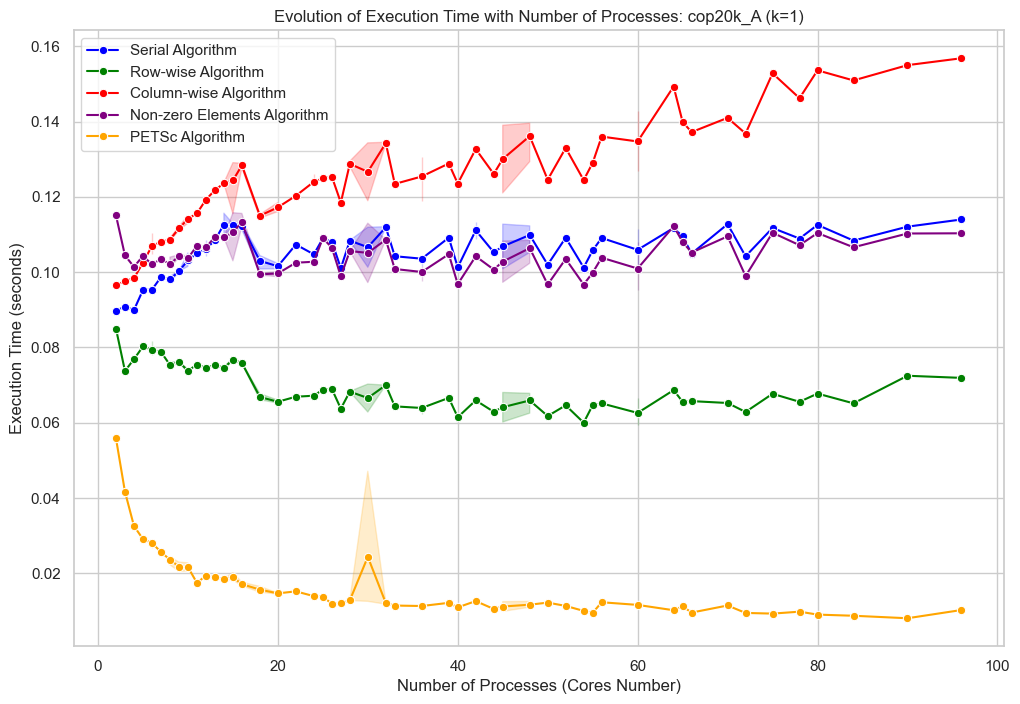

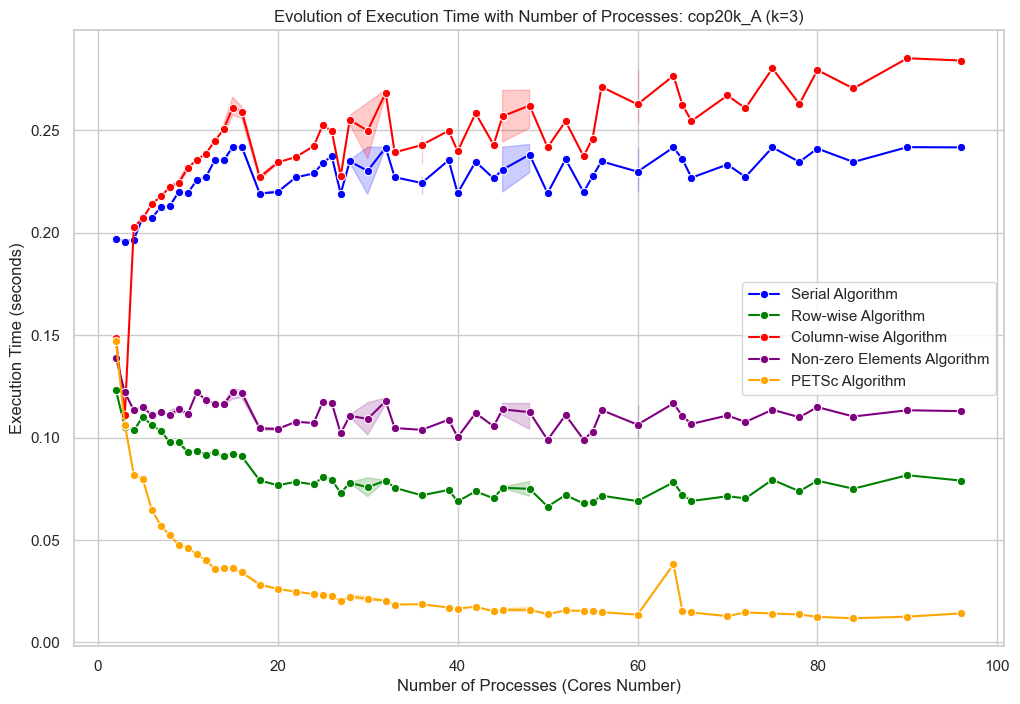

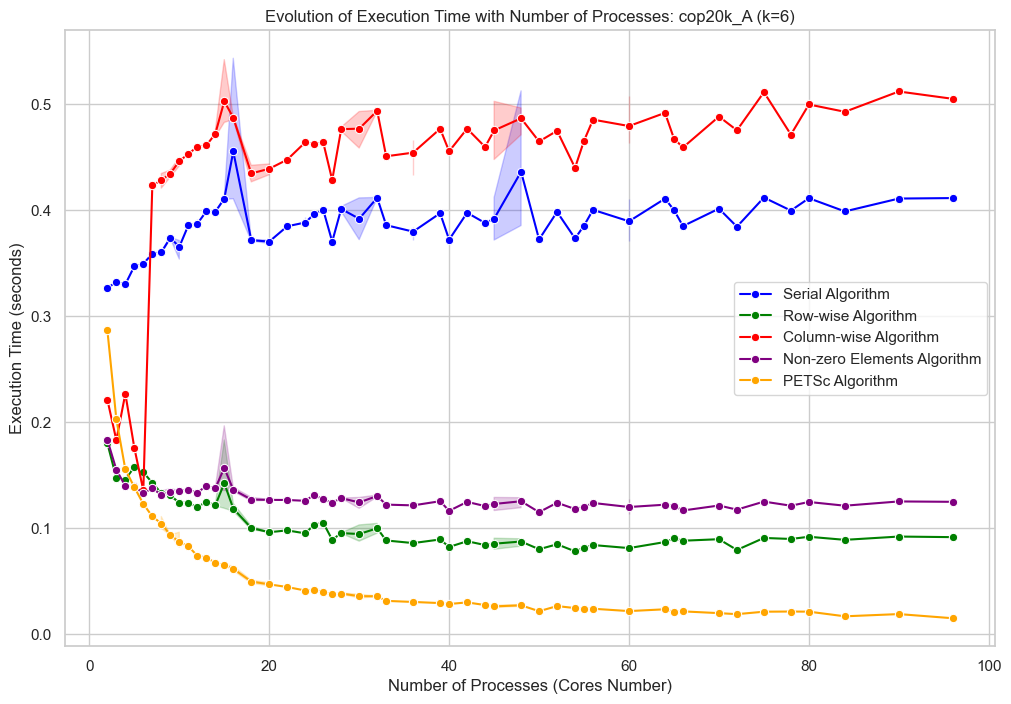

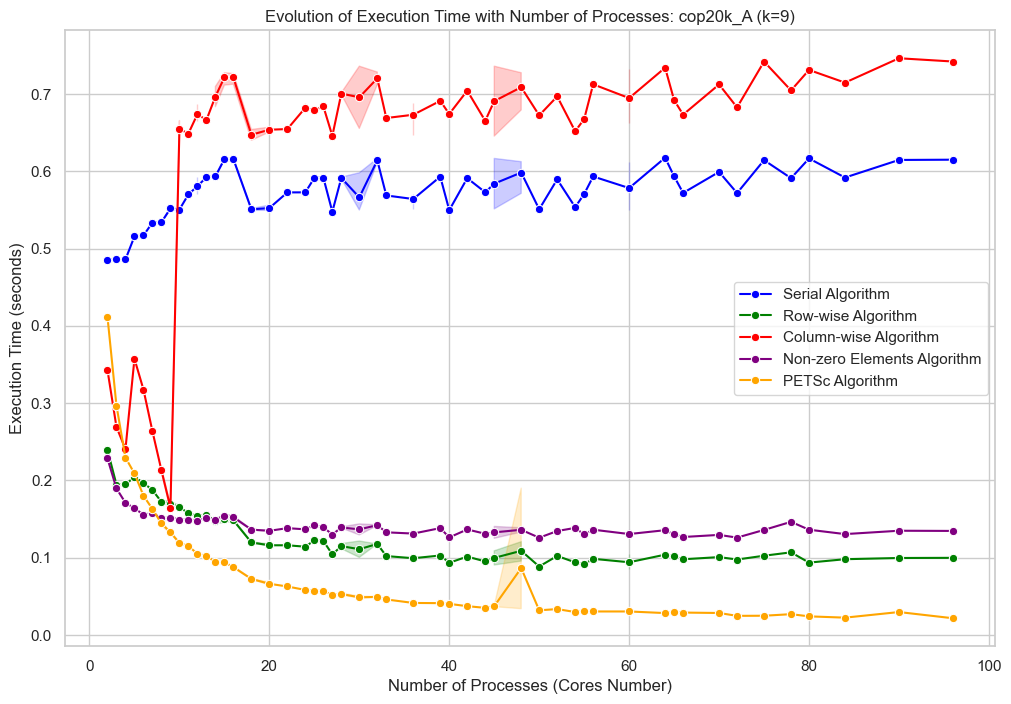

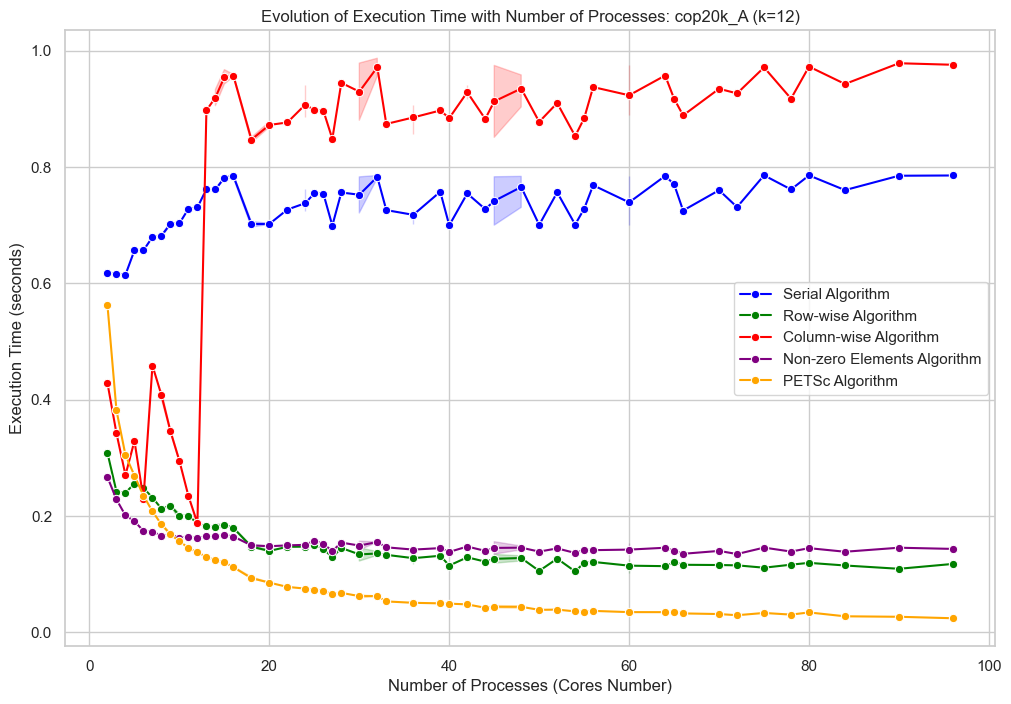

In [82]:
kvalues = df_join['k'].unique() 
# Sort the values
kvalues.sort()

for k in kvalues:
    df_sorted = df_join[df_join['k'] == k].sort_values(by=['Cores Number']).reset_index(drop=True)

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(x='Cores Number', y='Serial Algo Execution time', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
    sns.lineplot(x='Cores Number', y='Row-wise Execution time', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
    sns.lineplot(x='Cores Number', y='Column-wise Execution time', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
    sns.lineplot(x='Cores Number', y='Non-zero Elements Execution time', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
    sns.lineplot(x='Cores Number', y='PETSc Execution time', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Evolution of Execution Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('results/' + sparse_matrix_name + '_k' + str(k) + '.png')

    plt.show()

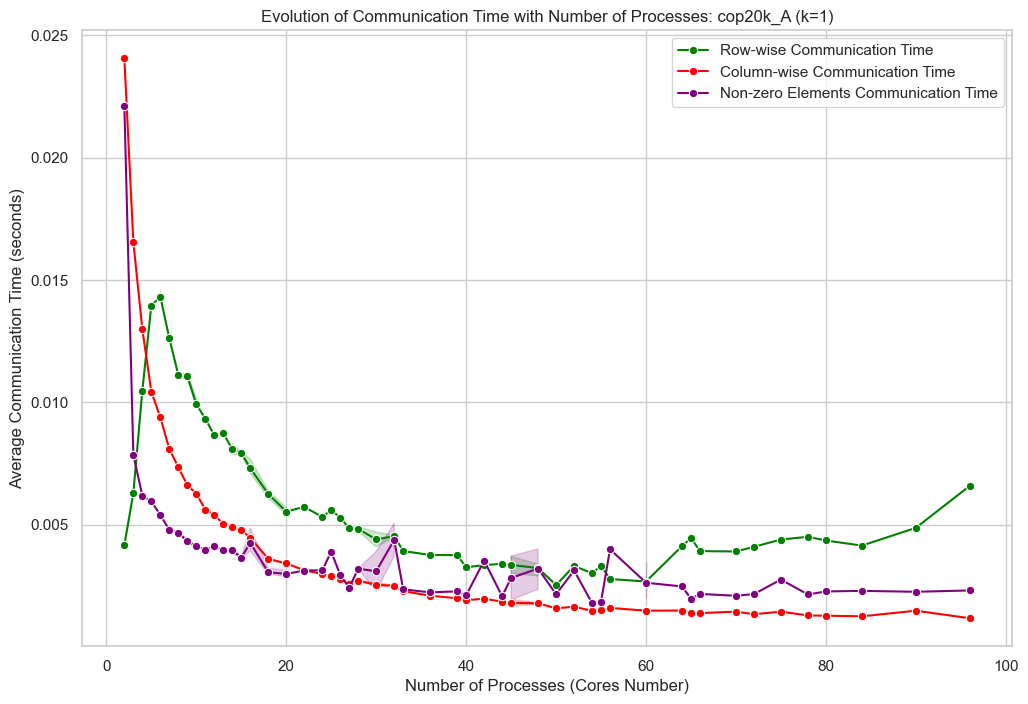

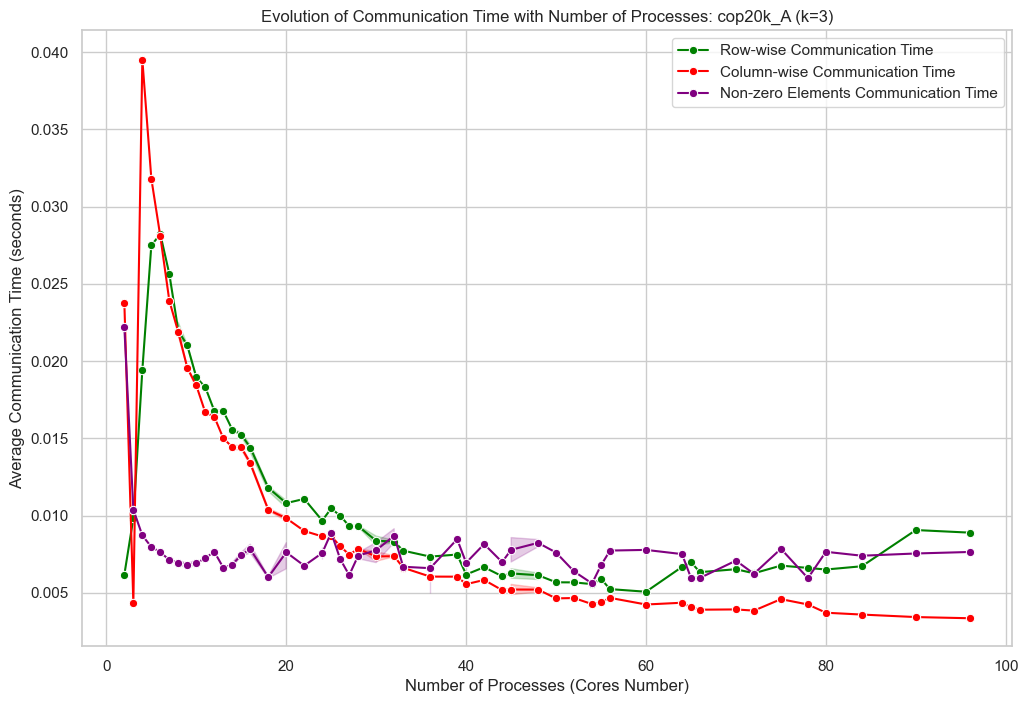

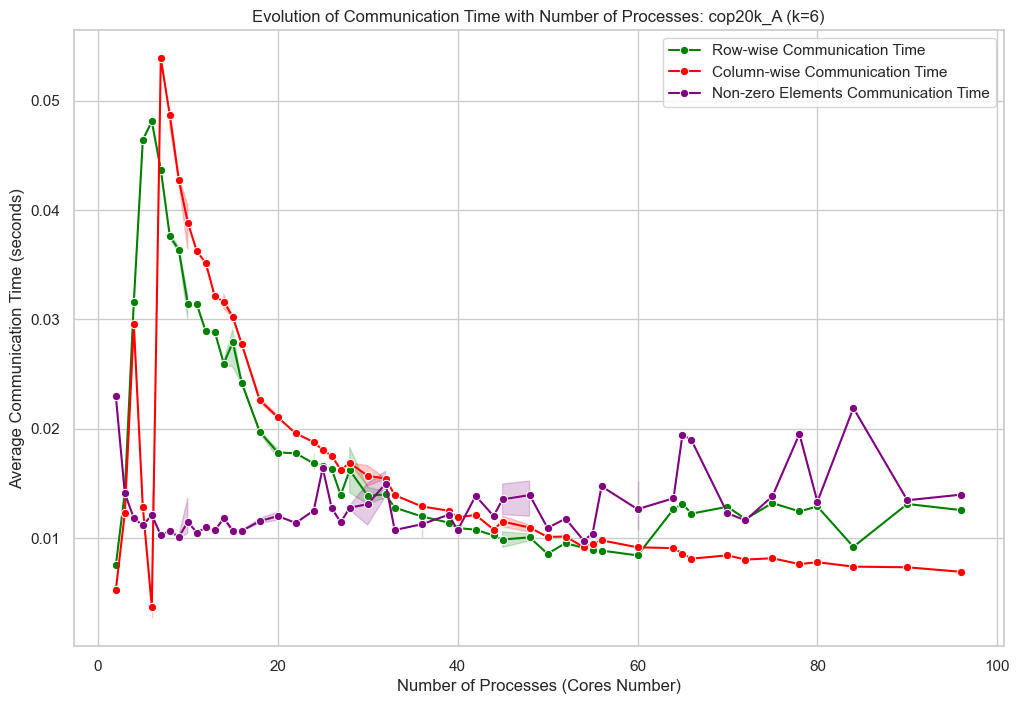

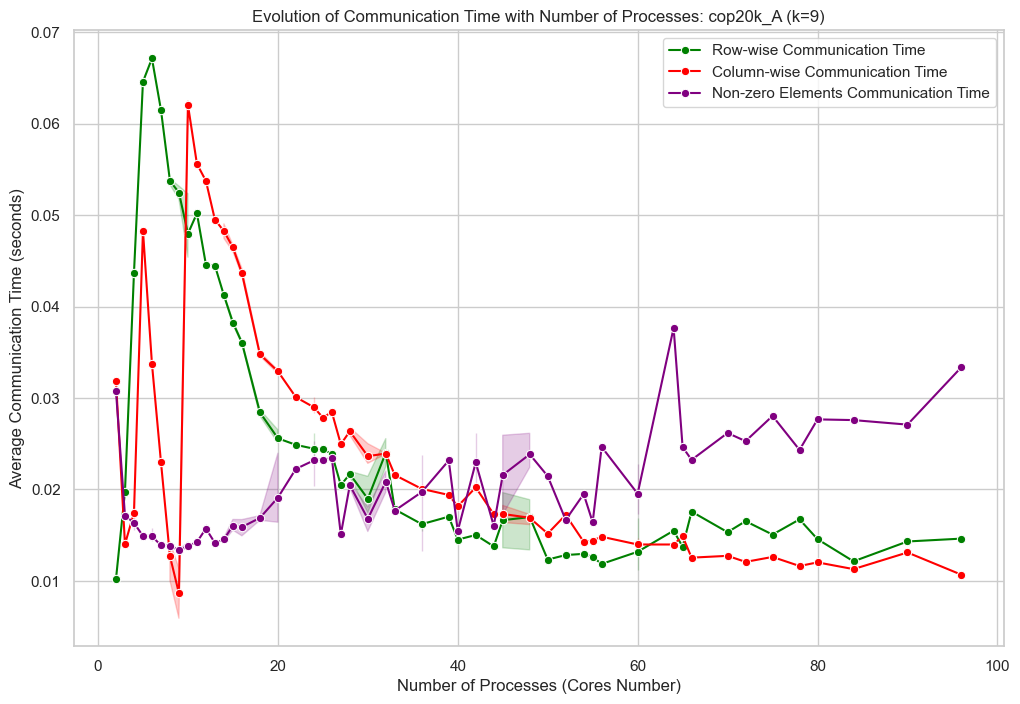

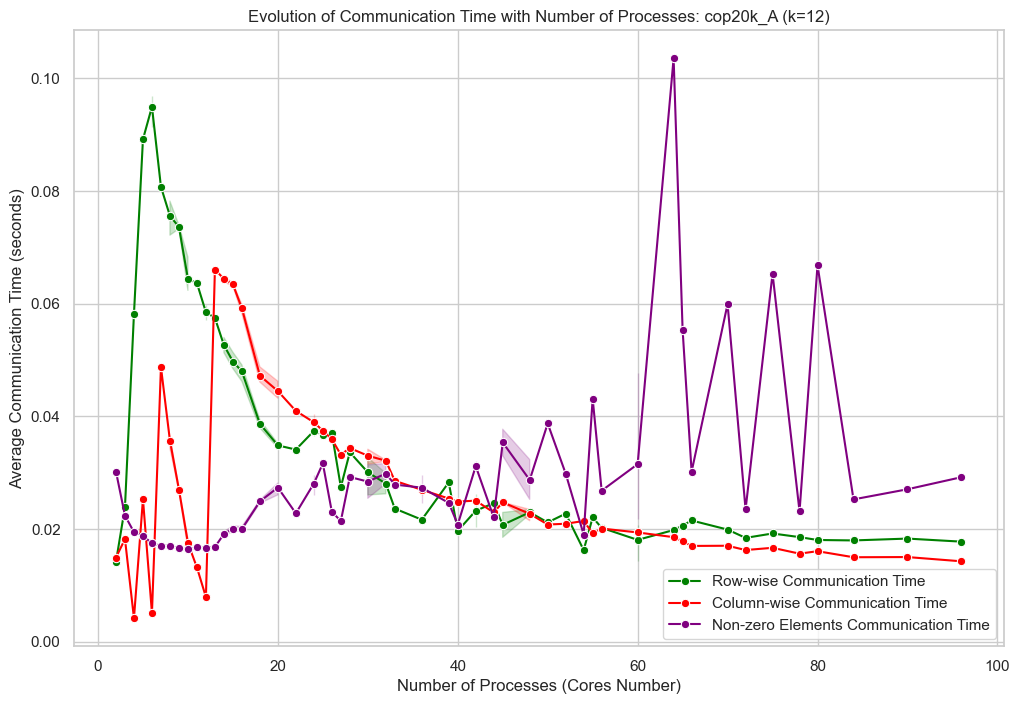

In [83]:
for k in kvalues:
    df_sorted = df_join[df_join['k'] == k].sort_values(by=['Cores Number']).reset_index(drop=True)

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Row-wise Communication Time
    sns.lineplot(x='Cores Number', y='Row-wise Average Communication Time', data=df_sorted, marker='o', label='Row-wise Communication Time', color='green')

    # Column-wise Communication Time
    sns.lineplot(x='Cores Number', y='Column-wise Average Communication Time', data=df_sorted, marker='o', label='Column-wise Communication Time', color='red')

    # Non-zero elements Communication Time
    sns.lineplot(x='Cores Number', y='Non-zero elements Average Communication Time', data=df_sorted, marker='o', label='Non-zero Elements Communication Time', color='purple')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Average Communication Time (seconds)')
    plt.title('Evolution of Communication Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
    plt.legend()

    plt.show()

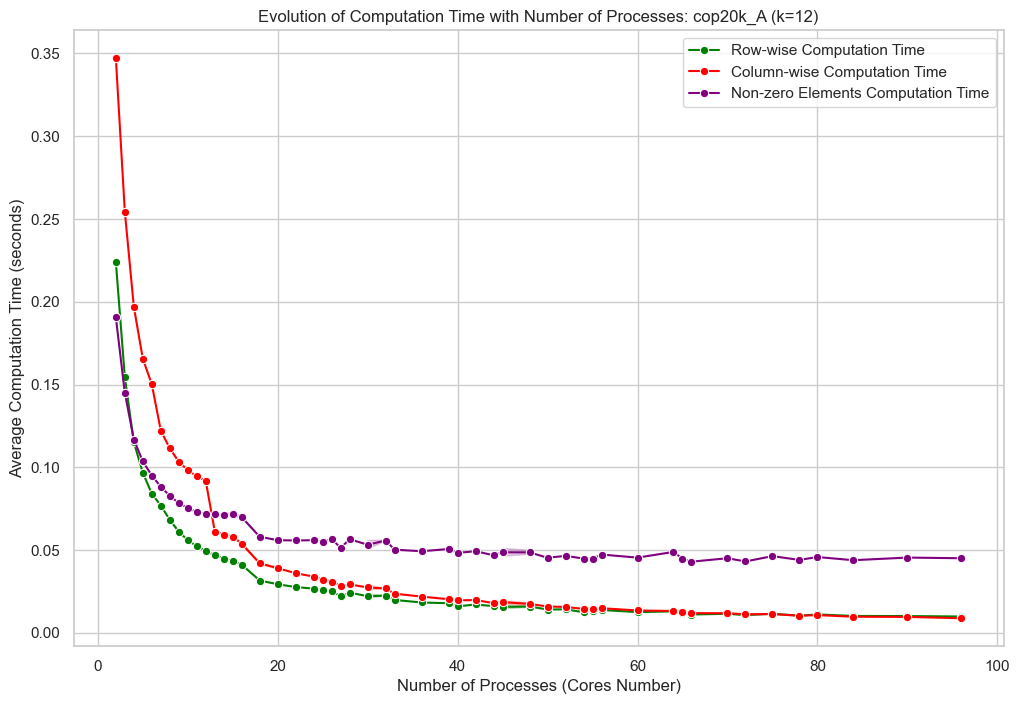

In [84]:
for k in kvalues:
    df_sorted = df_join[df_join['k'] == k].sort_values(by=['Cores Number']).reset_index(drop=True)
# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Row-wise Computation Time
sns.lineplot(x='Cores Number', y='Row-wise Average Computation Time', data=df_sorted, marker='o', label='Row-wise Computation Time', color='green')

# Column-wise Computation Time
sns.lineplot(x='Cores Number', y='Column-wise Average Computation Time', data=df_sorted, marker='o', label='Column-wise Computation Time', color='red')

# Non-zero elements Computation Time
sns.lineplot(x='Cores Number', y='Non-zero elements Average Computation Time', data=df_sorted, marker='o', label='Non-zero Elements Computation Time', color='purple')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Average Computation Time (seconds)')
plt.title('Evolution of Computation Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

plt.show()

In [85]:
df_join.insert(0, 'Total Row-Wise Execution Time', df_join['Row-wise Execution time'] + df_join['Setup time'])
df_join.insert(0, 'Total Column-Wise Execution Time', df_join['Column-wise Execution time'] + df_join['Setup time'])
df_join.insert(0, 'Total Non-zero Elements Execution Time', df_join['Non-zero Elements Execution time'] + df_join['Setup time'])
df_join.insert(0, 'Total PETSc Execution Time', df_join['PETSc Execution time'] + df_join['PETSc Setup time'] + df_join['PETSc Conversion time'])

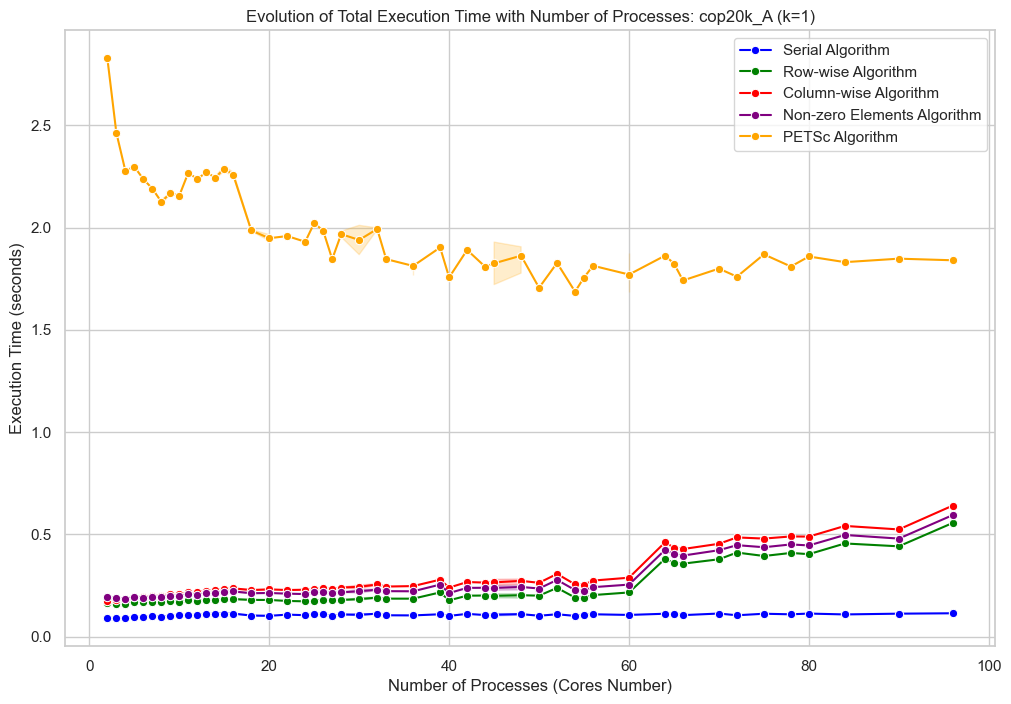

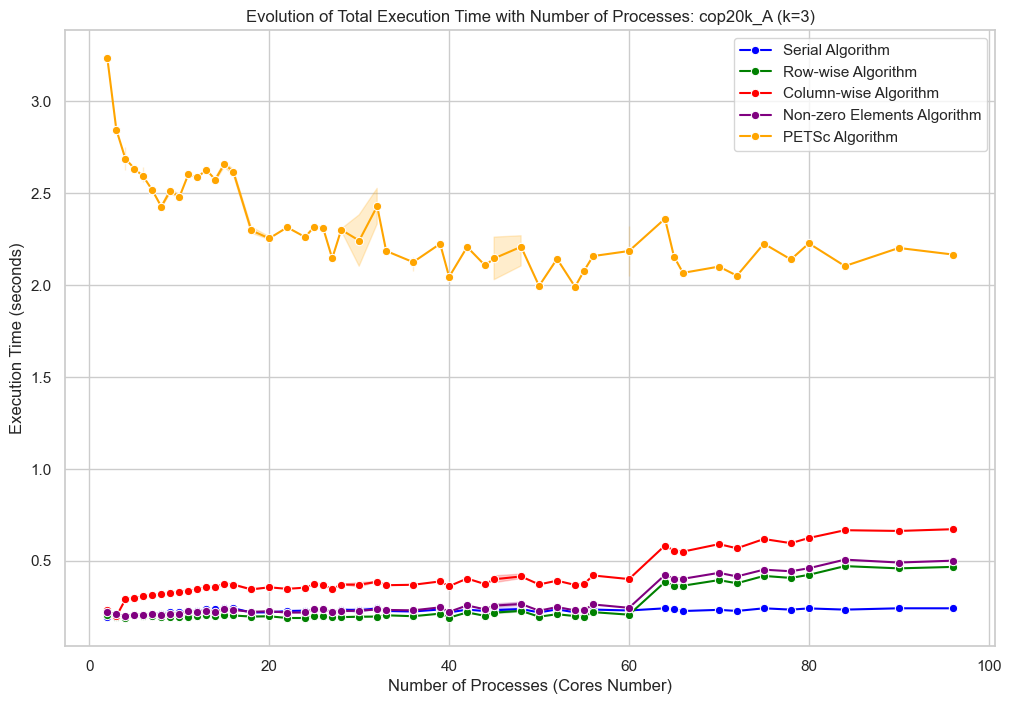

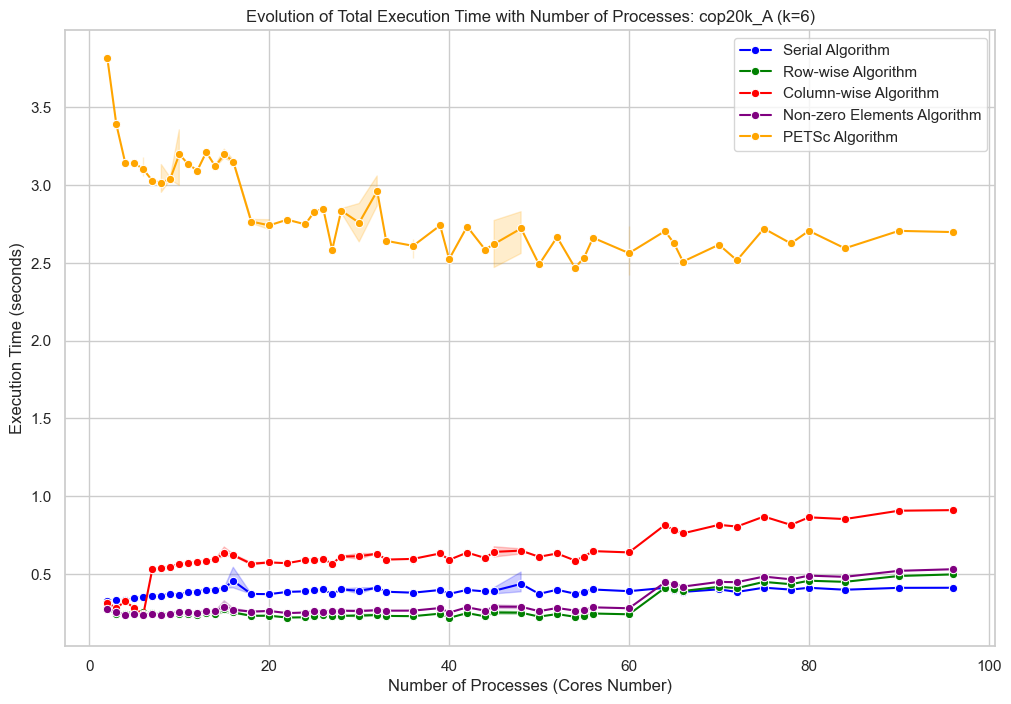

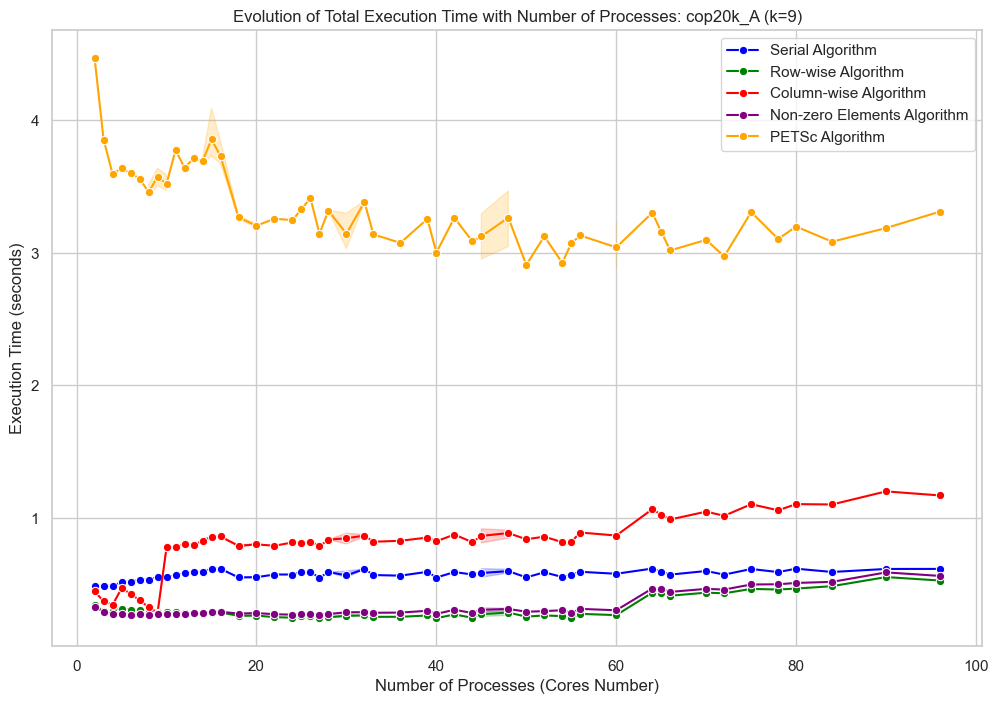

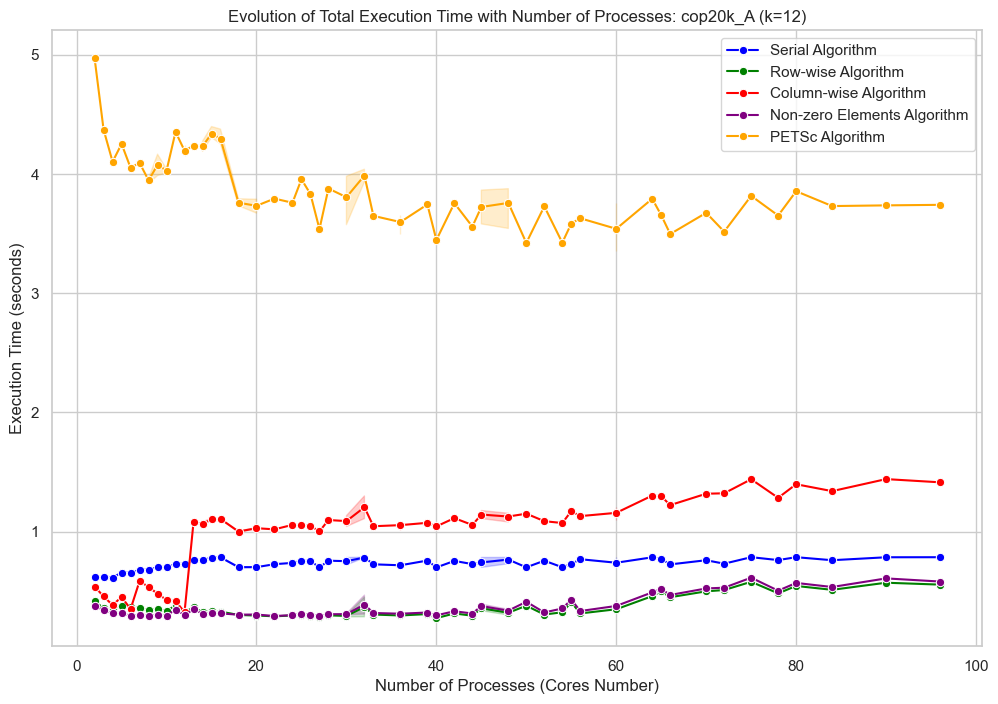

In [86]:
kvalues = df_join['k'].unique() 
# Sort the values
kvalues.sort()

for k in kvalues:
    df_sorted = df_join[df_join['k'] == k].sort_values(by=['Cores Number']).reset_index(drop=True)

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(x='Cores Number', y='Serial Algo Execution time', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
    sns.lineplot(x='Cores Number', y='Total Row-Wise Execution Time', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
    sns.lineplot(x='Cores Number', y='Total Column-Wise Execution Time', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
    sns.lineplot(x='Cores Number', y='Total Non-zero Elements Execution Time', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
    sns.lineplot(x='Cores Number', y='Total PETSc Execution Time', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Evolution of Total Execution Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.savefig('results/' + sparse_matrix_name + '_k' + str(k) + '.png')

    plt.show()

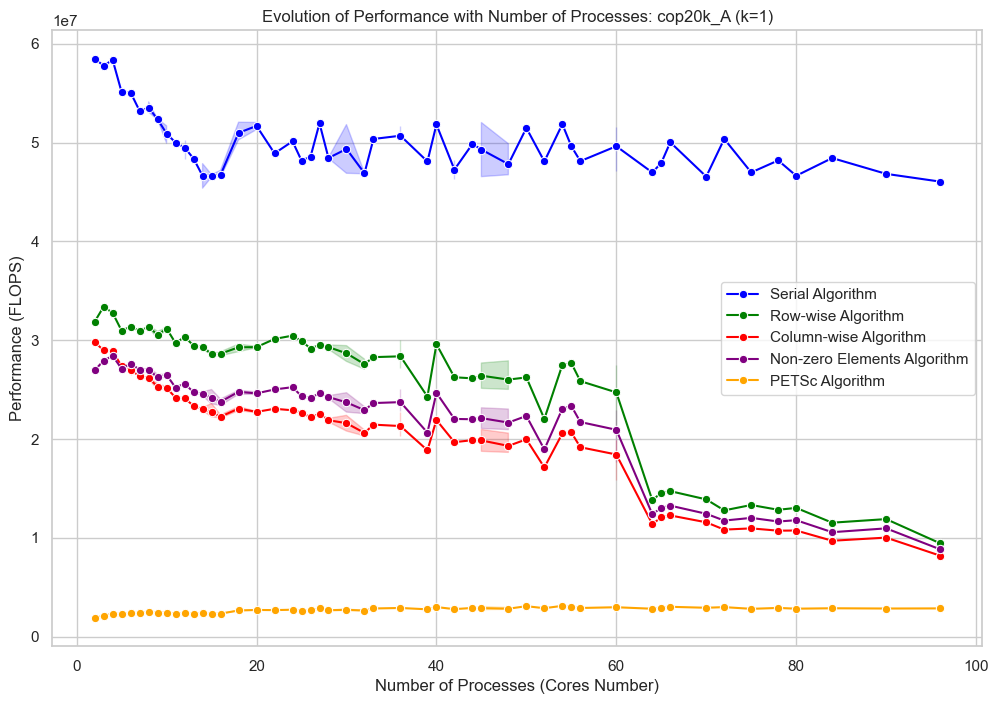

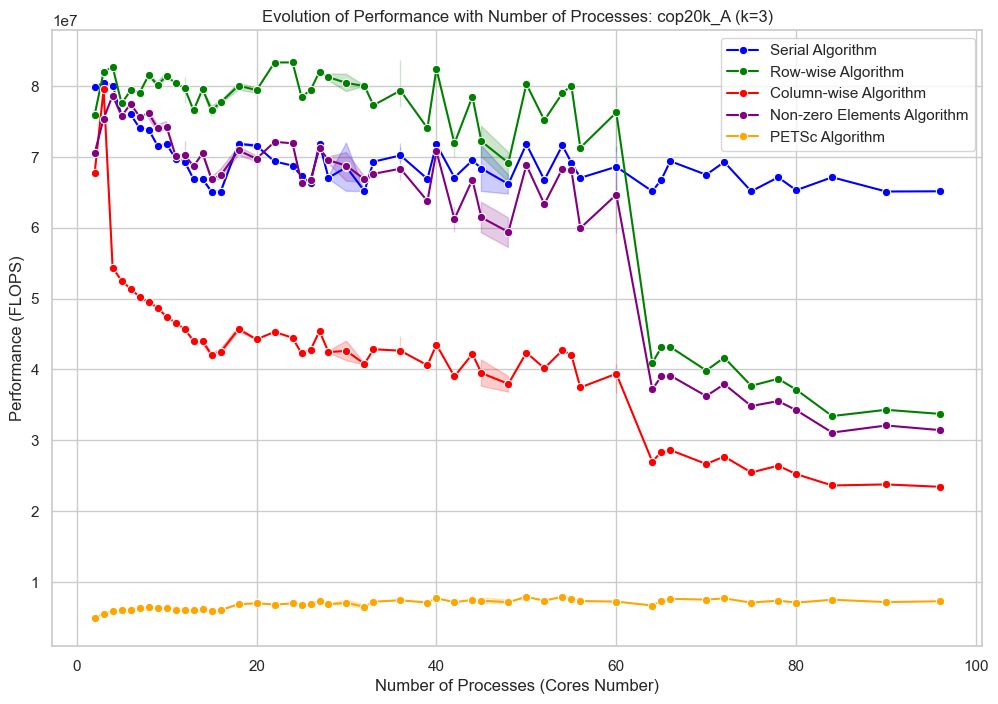

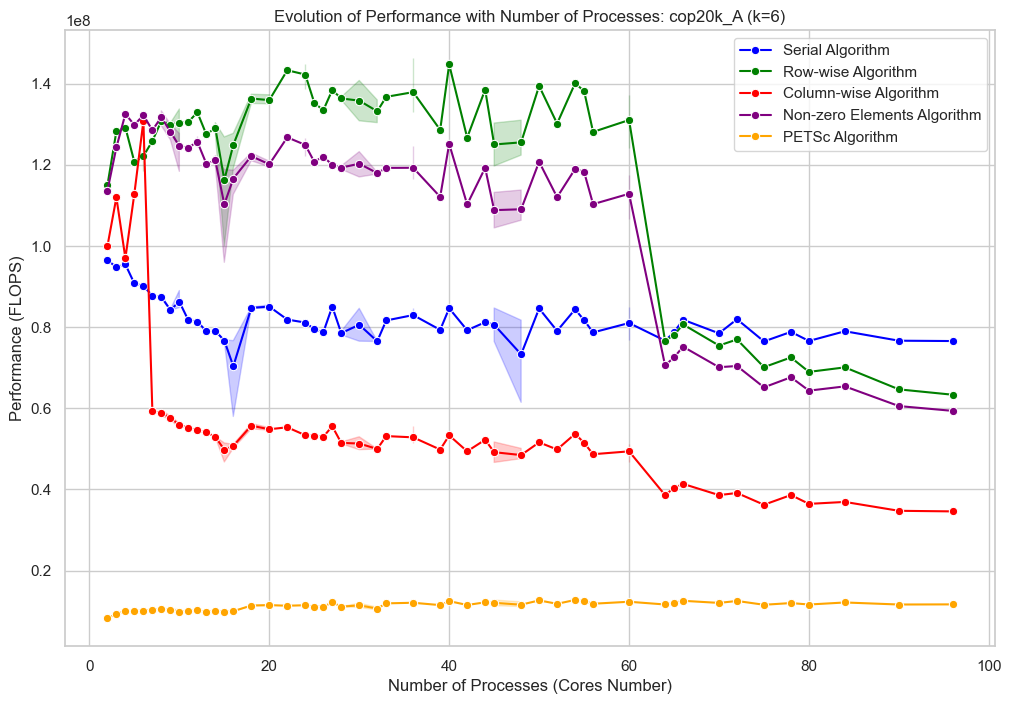

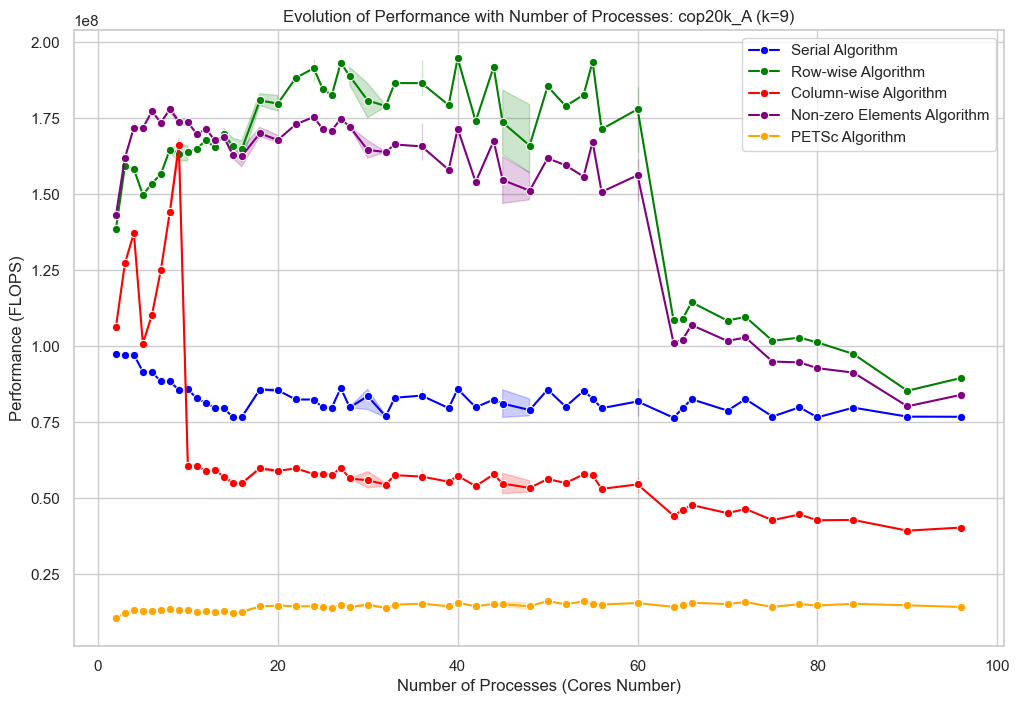

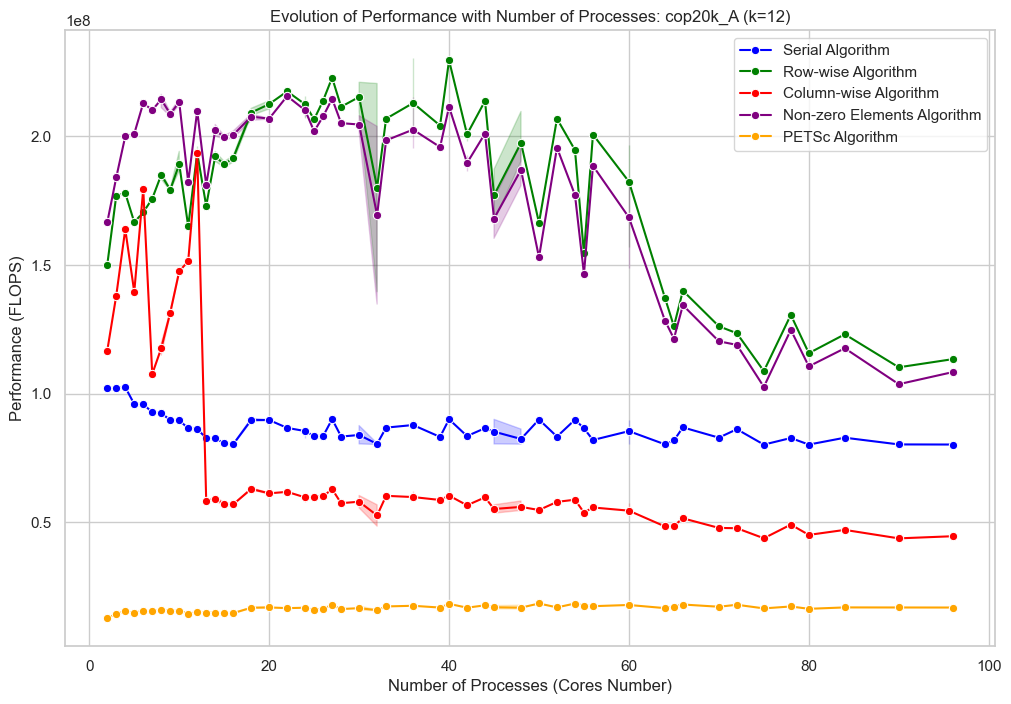

In [87]:
# Performance in FLOPS

# Number of non-zero elements in the sparse matrix (cop20k_A)
NZ = 2624331

df_join.insert(0, 'Serial Algo Performance', (2 * NZ * df_join['k']) / df_join['Serial Algo Execution time'])
df_join.insert(0, 'Row-wise Performance', (2 * NZ * df_join['k']) / df_join['Total Row-Wise Execution Time'])
df_join.insert(0, 'Column-wise Performance', (2 * NZ * df_join['k']) / df_join['Total Column-Wise Execution Time'])
df_join.insert(0, 'Non-zero Elements Performance', (2 * NZ * df_join['k']) / df_join['Total Non-zero Elements Execution Time'])
df_join.insert(0, 'PETSc Performance', (2 * NZ * df_join['k']) / df_join['Total PETSc Execution Time'])

for k in kvalues:
    df_sorted = df_join[df_join['k'] == k].sort_values(by=['Cores Number']).reset_index(drop=True)

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))

    # Setting the style
    sns.set(style="whitegrid")

    # Plot for each algorithm
    sns.lineplot(x='Cores Number', y='Serial Algo Performance', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
    sns.lineplot(x='Cores Number', y='Row-wise Performance', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
    sns.lineplot(x='Cores Number', y='Column-wise Performance', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
    sns.lineplot(x='Cores Number', y='Non-zero Elements Performance', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
    sns.lineplot(x='Cores Number', y='PETSc Performance', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

    plt.xlabel('Number of Processes (Cores Number)')
    plt.ylabel('Performance (FLOPS)')
    plt.title('Evolution of Performance with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
    plt.legend()

    # Saving the plot in the 'results' folder
    plt.show()